In [9]:
# Perform imports and load the dataset:
import pandas as pd 

# Load the dataset
df = pd.read_csv("smsspamcollection.csv", encoding="ISO-8859-1") 


In [11]:
# Display the shape of the dataset
print(df.shape)

# Display the first 5 rows
print(df.head())

# Show DataFrame info
df.info()

# Checking for null values
print(df.isnull().sum())
 

(5572, 2)
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
v1    0
v2    0
dtype: int64


In [13]:
# Checking Duplicate values 
df.duplicated().sum() 
# Drop Duplicate values 
df=df.drop_duplicates() 
df.shape 
 
# renaming the columns 
df.columns = ['label', 'message'] 
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.describe()
df.groupby('label').describe() 

message                                                               
        count unique                                                top freq
label                                                                       
ham      4516   4516  Go until jurong point, crazy.. Available only ...    1
spam      653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

,label_num,message_len
count,653.0,653.000000
mean,1.0,137.891271
std,0.0,30.137753
min,1.0,13.000000
25%,1.0,132.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


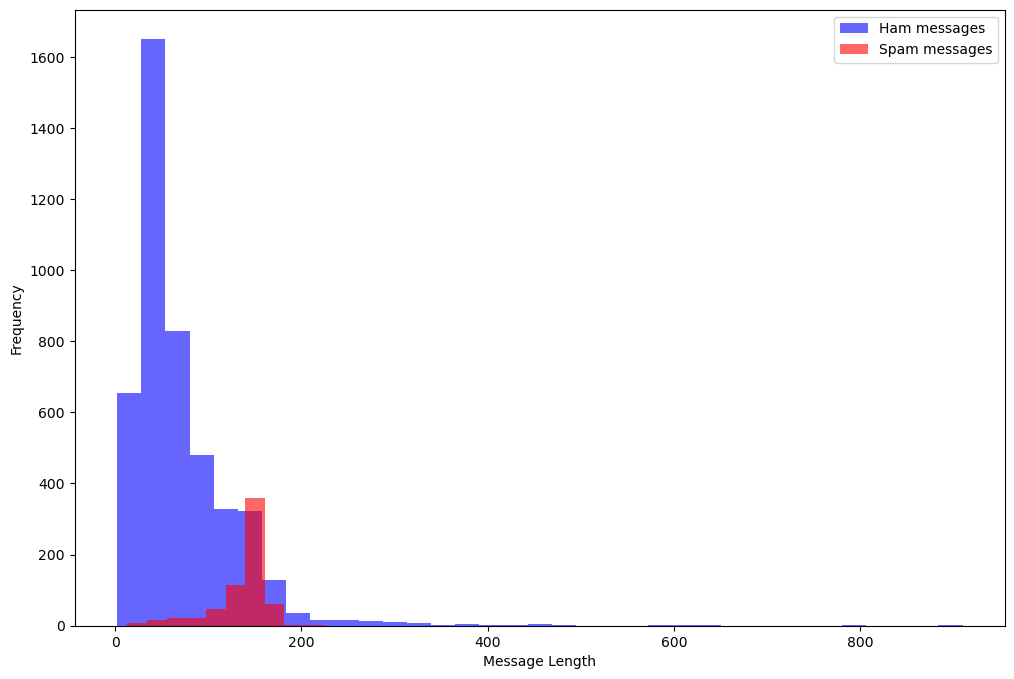

In [19]:
# convert label to a numerical variable 
df['label_num'] = df.label.map({'ham':0, 'spam':1}) 
df.head() 
 
df['message_len'] = df.message.apply(len) 
df.head() 
 
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 8)) 
 
df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue',  
                                       label='Ham messages', alpha=0.6) 
df[df.label=='spam'].message_len.plot(kind='hist', color='red',  
                                       label='Spam messages', alpha=0.6) 
plt.legend() 
plt.xlabel("Message Length") 
 
df[df.label=='ham'].describe()  
 
df[df.label=='spam'].describe() 

In [23]:
# import libraries
import re 
import string 
import nltk 
from nltk.corpus import stopwords 

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Prepare stop words
stop_words = stopwords.words('english') 
more_stopwords = ['u', 'im', 'c'] 
stop_words = stop_words + more_stopwords 

# Initialize the stemmer
stemmer = nltk.SnowballStemmer("english") 

# Preprocessing function
def preprocess(text): 
    text = text.lower()  # Convert text to lowercase 
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets 
    text = re.sub(r'http\S+\s*\S+', '', text)  # Remove URLs starting with http 
    text = re.sub(r'www\.\S+', '', text)  # Remove URLs starting with www 
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags 
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation 
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing numbers 
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords 
    text = ' '.join(stemmer.stem(word) for word in text.split())  # Stemming
    return text

# Apply the preprocessing function
df['message_clean'] = df['message'].apply(preprocess)

# Display first 20 rows
print(df.head(20))

# Print a specific cleaned message
print(df['message_clean'][304]) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   label                                            message  label_num  \
0    ham  Go until jurong point, crazy.. Available only ...          0   
1    ham                      Ok lar... Joking wif u oni...          0   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...          1   
3    ham  U dun say so early hor... U c already then say...          0   
4    ham  Nah I don't think he goes to usf, he lives aro...          0   
5   spam  FreeMsg Hey there darling it's been 3 week's n...          1   
6    ham  Even my brother is not like to speak with me. ...          0   
7    ham  As per your request 'Melle Melle (Oru Minnamin...          0   
8   spam  WINNER!! As a valued network customer you have...          1   
9   spam  Had your mobile 11 months or more? U R entitle...          1   
10   ham  I'm gonna be home soon and i don't want to tal...          0   
11  spam  SIX chances to win CASH! From 100 to 20,000 po...          1   
12  spam  URGENT! You have won a 1 wee

In [25]:
pip install wordcloud 

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 262.6 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.2 kB 365.7 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.2 kB 535.8 kB/s eta 0:00:01
   -------------------------------- ------- 245.8/301.2 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


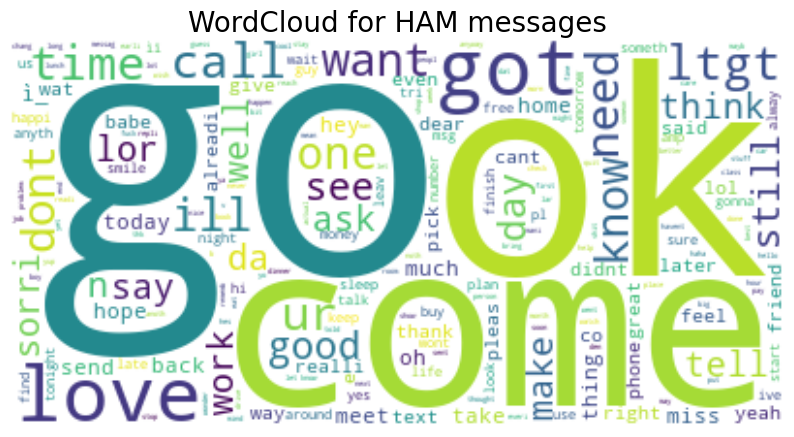

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
 
# Create a WordCloud object 
wc = WordCloud( 
    background_color='white', 
max_words=200,  
    contour_color='steelblue',  # Add contour color 
    contour_width=2,  # Add contour width 
) 
 
# Generate the WordCloud using text data for HAM messages 
ham_text = ' '.join(text for text in df.loc[df['label'] == 'ham', 'message_clean']) 
wc.generate(ham_text) 
 
# Visualize the WordCloud 
plt.figure(figsize=(10, 8)) 
plt.imshow(wc, interpolation='bilinear') 
plt.title('WordCloud for HAM messages', fontsize=20) 
plt.axis('off') 
plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vect = TfidfVectorizer() 
 
X = tfidf_vect.fit_transform(df['message_clean']) 
y = df['label'] 

In [31]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
 
# Split data into train & test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
# Naive Bayes 
nb_clf = MultinomialNB().fit(X_train, y_train) 
 
# SVM 
svm_clf = SVC(kernel='linear').fit(X_train, y_train) 

In [33]:
# Performance metrics comparison 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score  # Importing accuracy_score 
 
# Naive Bayes 
nb_predicted = nb_clf.predict(X_test) 
nb_report = classification_report(y_test, nb_predicted) 
# Calculate error rate for Naive Bayes 
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted) 
nb_cm = confusion_matrix(y_test, nb_predicted) 
 
# SVM 
svm_predicted = svm_clf.predict(X_test) 
svm_report = classification_report(y_test, svm_predicted) 
# Calculate error rate for SVM 
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted) 
svm_cm = confusion_matrix(y_test, svm_predicted)
nb_cm

array([[1107,    0],
       [  62,  124]], dtype=int64)

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
 
# Function to plot confusion matrix 
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues): 
    plt.figure(figsize=(8, 6)) 
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, 
yticklabels=classes) 
    plt.title(title) 
    plt.xlabel('Predicted label') 
    plt.ylabel('True label') 
    plt.show() 
 
# Plot confusion matrix for Naive Bayes 
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix') 